<a class="anchor" id="0"></a>
# **W03 - Class Practice**
#### **Heidy Mudita Sutedjo - 0706022310044**

## **About the Dataset**

The GlobalCoffeeHealth dataset contains 10,000 synthetic records reflecting real-world patterns
of coffee consumption, sleep behavior, and health outcomes across 20 countries. It includes
demographics, daily coffee intake, caffeine levels, sleep duration and quality, BMI, heart rate,
stress, physical activity, health issues, occupation, smoking, and alcohol consumption.

The dataset captures realistic correlations observed in research, such as caffeine’s impact on
sleep, stress, and health, making it ideal for statistical analysis, predictive modeling, and lifestyle
or wellness studies.


In [41]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

Now, we know that column `Health_Issues` (which is the target column) have 5941 rows null. This is because the values supposed to be 'None' are read as null values by the CSV.

So i replaced the null values with 'None'.

I also decided to drop column `ID` since it has already been represented with the row number.

In [44]:
df['Health_Issues'].fillna('None', inplace=True)
df = df.drop('ID', axis=1)

display(df.head())

/tmp/ipython-input-2548434668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_Issues'].fillna('None', inplace=True)


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Country                  10000 non-null  object 
 3   Coffee_Intake            10000 non-null  float64
 4   Caffeine_mg              10000 non-null  float64
 5   Sleep_Hours              10000 non-null  float64
 6   Sleep_Quality            10000 non-null  object 
 7   BMI                      10000 non-null  float64
 8   Heart_Rate               10000 non-null  int64  
 9   Stress_Level             10000 non-null  object 
 10  Physical_Activity_Hours  10000 non-null  float64
 11  Health_Issues            10000 non-null  object 
 12  Occupation               10000 non-null  object 
 13  Smoking                  10000 non-null  int64  
 14  Alcohol_Consumption    

In [91]:
df.describe()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000
mean,34.949100,1.545300,10.563400,2.509230,238.411010,6.636220,2.738000,23.986860,70.617800,2.60280,7.48704,3.544400,3.014700,0.20040,0.300700
std,11.160939,0.541458,5.758897,1.450248,137.748815,1.222055,0.809952,3.906411,9.822951,0.65702,4.31518,0.592338,1.412262,0.40032,0.458585
min,18.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,15.000000,50.000000,1.00000,0.00000,1.000000,1.000000,0.00000,0.000000
25%,26.000000,1.000000,6.000000,1.500000,138.750000,5.800000,2.000000,21.300000,64.000000,2.00000,3.70000,3.000000,2.000000,0.00000,0.000000
50%,34.000000,2.000000,11.000000,2.500000,235.400000,6.600000,3.000000,24.000000,71.000000,3.00000,7.50000,4.000000,3.000000,0.00000,0.000000
75%,43.000000,2.000000,16.000000,3.500000,332.025000,7.500000,3.000000,26.600000,77.000000,3.00000,11.20000,4.000000,4.000000,0.00000,1.000000
max,80.000000,3.000000,20.000000,8.200000,780.300000,10.000000,4.000000,38.200000,109.000000,3.00000,15.00000,4.000000,5.000000,1.00000,1.000000


Now, we can see that there are no missing values in the data.

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [46]:
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']

for col in col_names:
    print(df[col].value_counts())

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64
Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64


### Encode categorical variables


Now, I will encode the categorical variables.

In [48]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['None' 'Mild' 'Moderate' 'Severe']
['Other' 'Service' 'Office' 'Student' 'Healthcare']


In [49]:
# Encoding for ordinal columns
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
country_map = {'Germany': 1, 'Brazil': 2, 'Spain': 3, 'Mexico': 4, 'France': 5, 'Canada': 6, 'UK': 7, 'Switzerland': 8, 'Netherlands': 9, 'Italy': 10, 'China': 11, 'Japan': 12, 'Belgium': 13, 'Finland': 14, 'Australia': 15, 'USA': 16, 'Sweden': 17, 'India': 18, 'Norway': 19, 'South Korea': 20}
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 3, 'Medium': 2, 'High': 1}
health_issues_map = {'None': 4, 'Mild': 3, 'Moderate': 2, 'Severe': 1}
occupation_map = {'Student': 1, 'Service': 2, 'Office': 3, 'Healthcare': 4, 'Other': 5}


df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)
df['Occupation'] = df['Occupation'].map(occupation_map)

display(df.sample(n = 5))

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
8362,19,1,16,4.6,433.9,5.4,2,23.9,67,2,2.0,3,5,1,0
2188,29,2,7,0.5,51.9,8.4,4,24.9,62,3,9.6,4,2,0,1
5387,18,2,14,1.3,125.6,6.4,3,21.9,67,3,2.2,4,3,0,0
977,18,2,16,1.8,166.5,6.0,3,30.5,73,3,1.8,3,4,0,0
9506,33,2,17,2.1,202.5,6.3,3,25.7,50,3,2.4,4,1,0,1


### Exploratory Data Analysis (EDA)

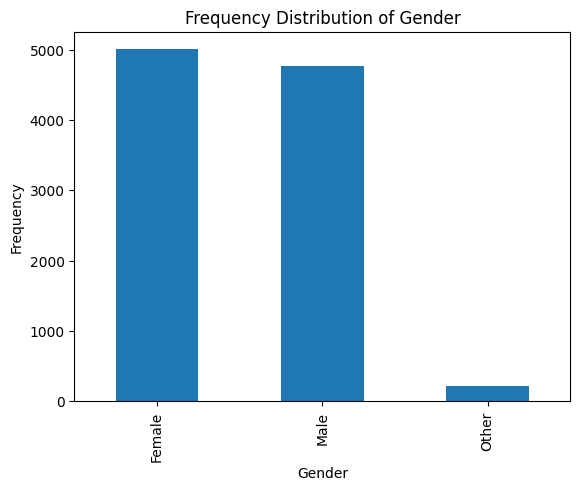

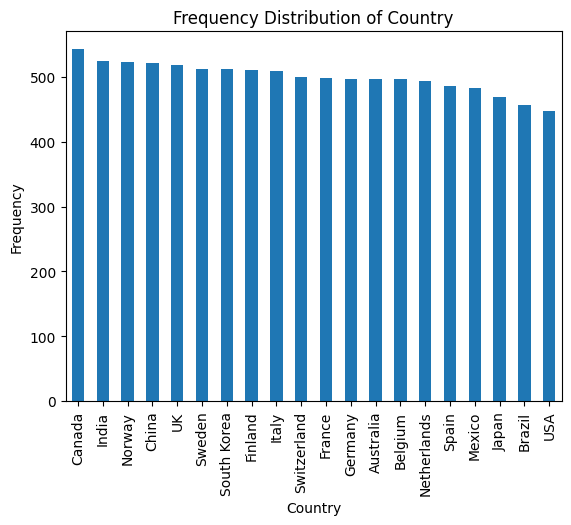

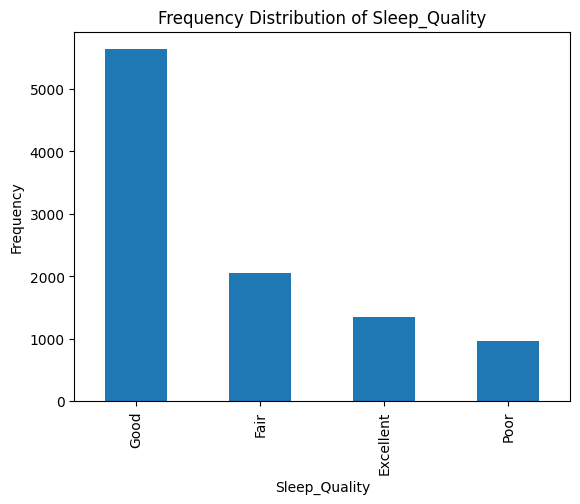

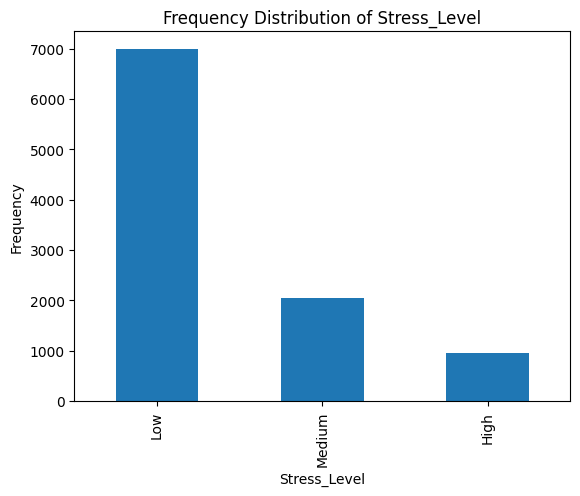

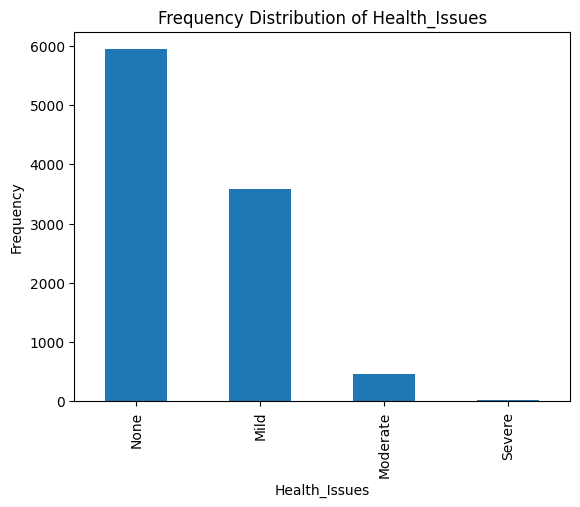

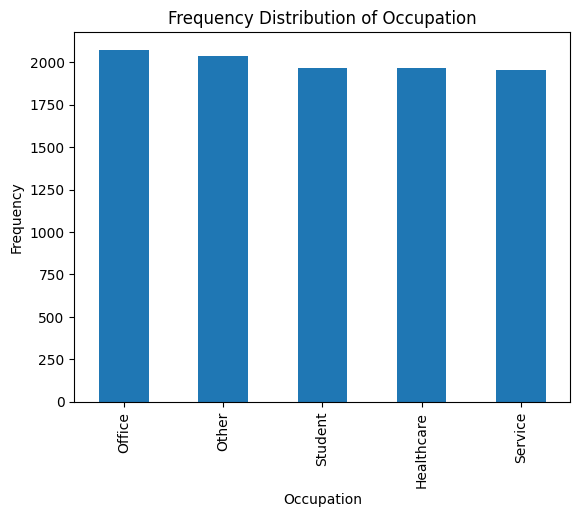

In [47]:
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

From these charts, we can see that the data distribution of `Sleep_Quality`, `Stress_Level`, and `Health_Issues` are not equal.

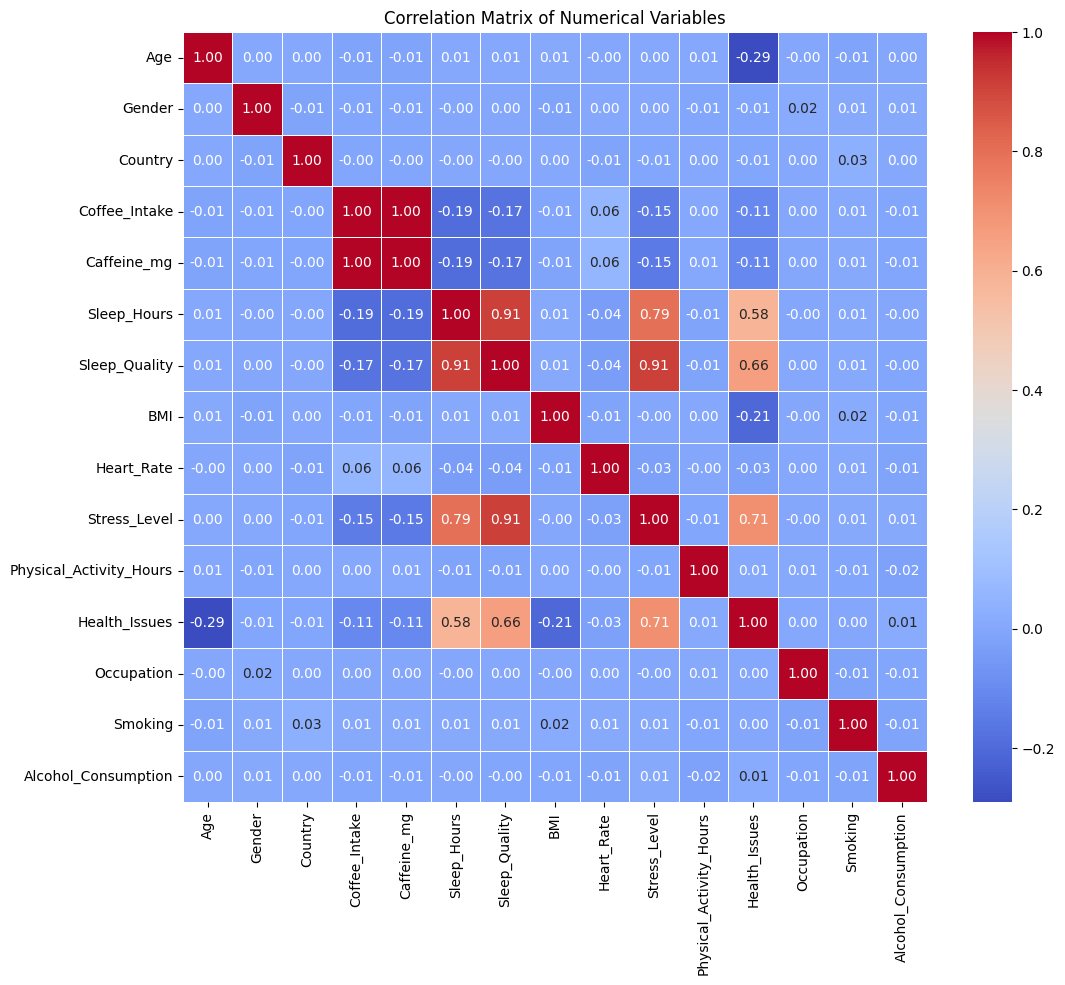

In [94]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

We can see from the heatmap that sleep quality and stress level have a strong relationship.

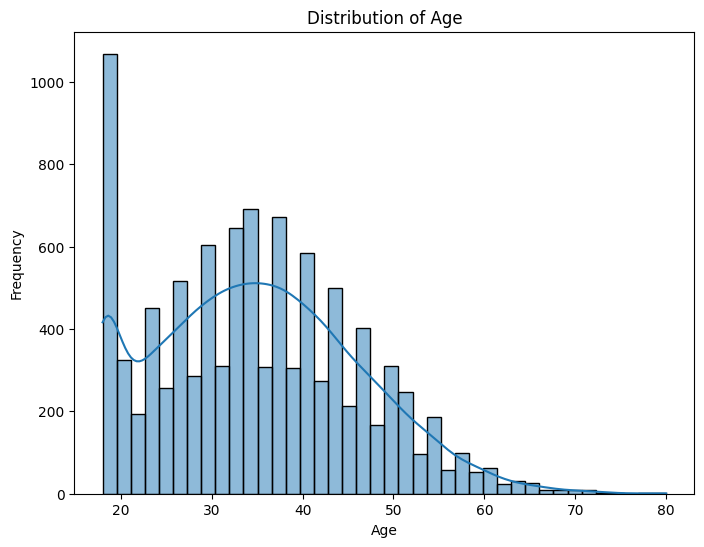

In [95]:
# Plot histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see from the plot above, that more than 1000 patients are below age 20.

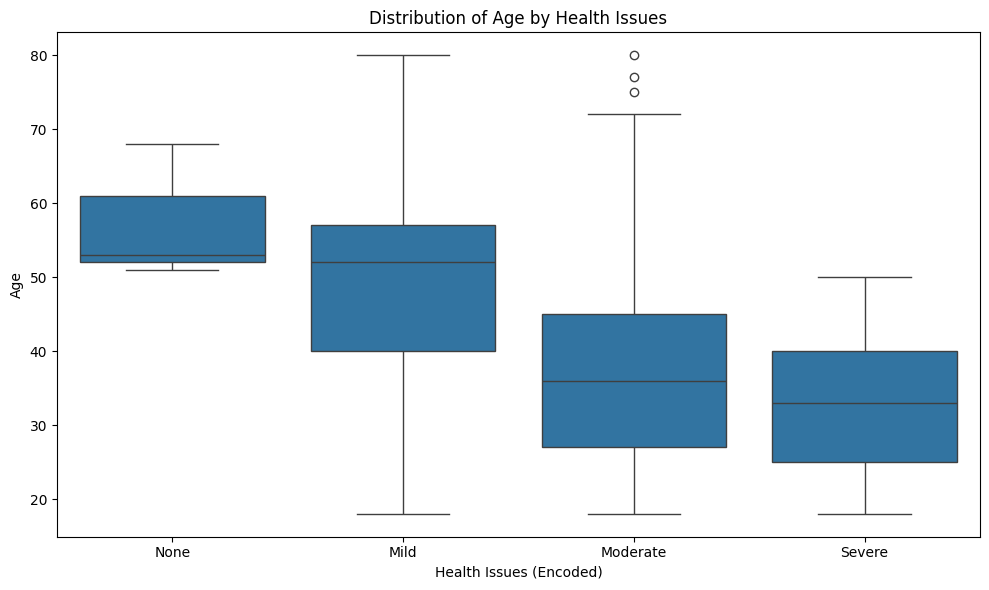

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Health_Issues', y='Age', data=df)
plt.title('Distribution of Age by Health Issues')
plt.xlabel('Health Issues (Encoded)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2, 3], labels=['None', 'Mild', 'Moderate', 'Severe']) # Assuming the encoding is 0, 1, 2, 3
plt.tight_layout()
plt.show()

The box plot shows the distribution of age for each category of health issues.

There seems to be a slight trend where the median age tends to be lower for the 'None' health issue category and gradually increases for 'Mild', 'Moderate', and 'Severe' health issues.

The spread of ages (indicated by the size of the boxes and whiskers) also appears to vary across health issue categories.

The box plot also highlights potential outliers in age within each health issue category.

This suggests that age might be a factor influencing the presence and severity of health issues in this dataset.

### Declare Feature Vector and Target Variable

In [50]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [51]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,3,14.5,5,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,3,11.0,2,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,3,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,3,6.6,5,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,1,0,1


In [53]:
y.head()

,Health_Issues
0,4
1,4
2,3
3,3
4,3


### Split data into separate training and test set

In [54]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [56]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,3,4.3,405.6,5.4,2,18.0,86,2,2.4,2,0,1
1561,26,1,18,0.0,0.0,5.5,2,28.3,75,2,10.8,5,0,0
1670,32,1,20,2.8,268.1,7.3,3,27.4,69,3,8.6,3,0,0
6087,18,1,20,2.2,208.6,8.1,4,16.3,83,3,8.9,5,0,1
6669,43,2,7,2.6,251.1,9.4,4,25.4,68,3,3.4,3,0,0


In [57]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,19,2.6,245.9,6.7,3,30.1,76,3,1.9,2,0,1
4684,22,2,4,3.1,293.1,7.6,3,20.4,69,3,5.0,2,0,0
1731,30,1,15,3.9,372.4,6.4,3,27.5,75,3,13.8,3,0,0
4742,35,1,1,1.0,92.5,5.3,2,23.1,71,2,2.4,2,0,0
4521,47,1,10,1.3,119.0,6.9,3,28.4,64,3,9.6,3,1,0


We now have training and test set ready for model building.

### **Decision Tree Classifier with Criterion Gini Index**

In [58]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [80]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### Predict Test Set Results with Criterion Gini Index

In [81]:
y_pred_gini = clf_gini.predict(X_test)

#### Check Acurracy Score with Criterion Gini Index

In [82]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

#### Visualize Decision Trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 132, 0, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [12, 209, 0, 0]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [0, 31, 800, 4723]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

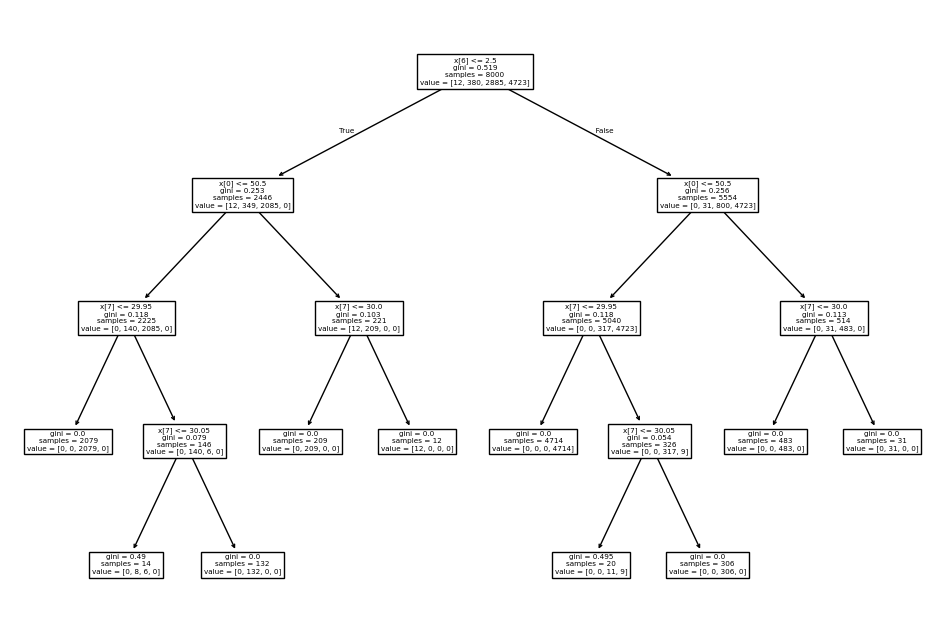

In [62]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

### **Decision Tree Classifier with Criterion Entropy**

In [83]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### Predict Test Set Results with Criterion Entropy

In [84]:
y_pred_en = clf_en.predict(X_test)

#### Check Acurracy Score with Criterion Entropy

In [85]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


#### Visualize Decision Trees

[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [12, 209, 0, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [0, 31, 800, 4723]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [0, 0, 317, 4723]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

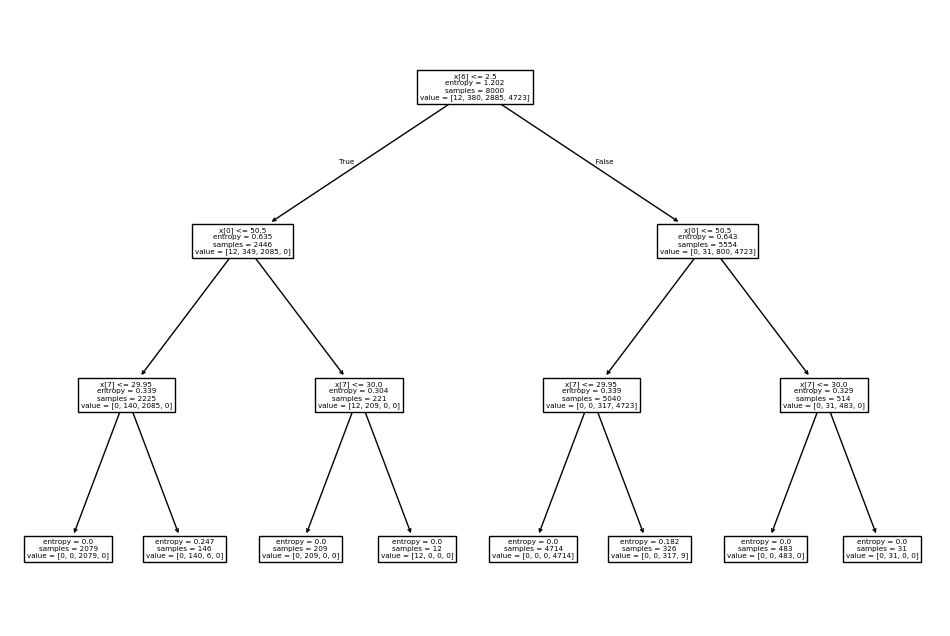

In [66]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

### **Naive Bayes**

In [68]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

#### Predict Test Set Results with Naive Bayes

In [69]:
y_pred_nb = nb_classifier.predict(X_test)

#### Check Acurracy Score with Naive Bayes

In [70]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8575


### **Summary**

#### Accuracy score:
* Criterion Gini Index: 0.9965 (99.65%)
* Criterion Entropy: 0.9965 (99.65%)
* Naive Bayes: 0.8575 (85.75%)

Both Decision Tree models (with Gini and Entropy criteria) achieved very high accuracy scores of 99.65%. This suggests that the decision tree algorithm is performing exceptionally well on this dataset for predicting health issues.

The Naive Bayes model, while still having a respectable accuracy of 85.75%, performed significantly worse than the Decision Tree models.

Given the high accuracy of the Decision Tree models, they are more suitable for this dataset's classification task.

### **Prediction for New, Unlabeled Record**

In [90]:
# Make a prediction with the gini index model

# Input values: buying high, maint low, doors 4, persons 2, lug_boot med, safety low
# These values need to be encoded according to the maps created earlier
input_data = {
  'Age': 28,
  'Gender': gender_map['Male'],
  'Country': country_map['Brazil'],
  'Coffee_Intake': 3,
  'Caffeine_mg': 280,
  'Sleep_Hours': 5,
  'Sleep_Quality': sleep_quality_map['Poor'],
  'BMI': 25.4,
  'Heart_Rate': 85,
  'Stress_Level': stress_level_map['High'],
  'Physical_Activity_Hours': 2,
  'Occupation': occupation_map['Student'],
  'Smoking': '1',
  'Alcohol_Consumption': '1'
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)
prediction_entropy = clf_en.predict(input_df)

print("Prediction Gini:", prediction_gini[0])
print("Prediction Entropy:", prediction_entropy[0])

# To get the inverse, we can use the class_map to get the original label
# This was already done in the previous step to print the predicted class.
# class_map = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
# class_map.items() → mengembalikan pasangan (key, value) misalnya ('unacc',0).
# {v:k for k,v in class_map.items()} → menukar posisi key & value.
# inv_class_map = {1: 'unacc', 2: 'acc', 3: 'good', 4: 'vgood'}

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in health_issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction Gini: 3
Prediction Entropy: 3
The predicted class for the given input using the gini index model is: Mild
